In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd

how many : 2
2 개 티커 입력 : tsm
['tsm']
1 개 티커 입력 : qqq
['tsm', 'qqq']
white or black : black
[*********************100%***********************]  1 of 1 completed
tsm
[*********************100%***********************]  1 of 1 completed
qqq
[*********************100%***********************]  1 of 1 completed


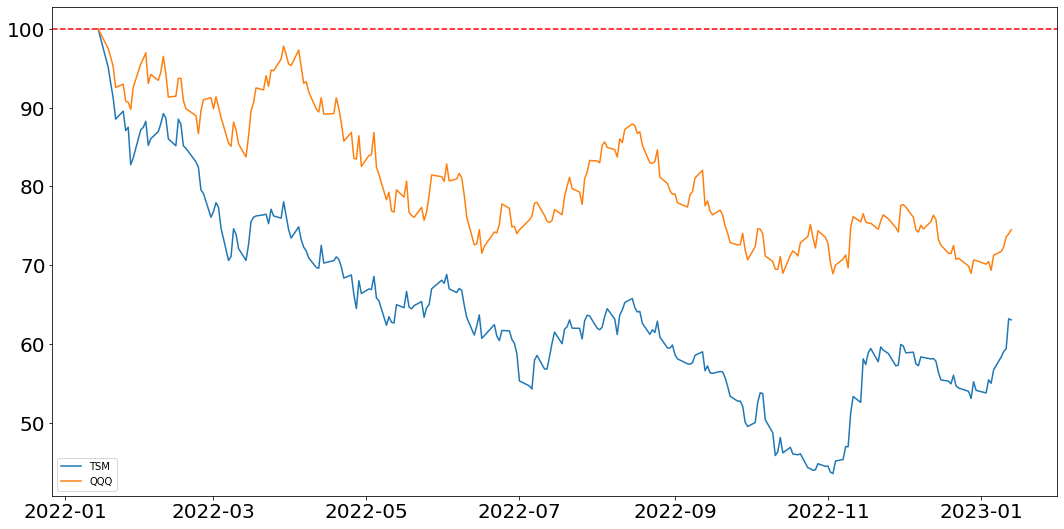

,SPY,tsm,qqq
Date,,,
2022-01-14,464.720001,140.660004,380.010010
2022-01-18,456.489990,133.830002,370.549988
2022-01-19,451.750000,131.009995,366.480011
2022-01-20,446.750000,128.330002,361.720001
2022-01-21,437.980011,124.529999,351.690002
...,...,...,...
2023-01-09,387.859985,80.309998,270.540009
2023-01-10,390.579987,81.269997,272.829987
2023-01-11,395.519989,81.779999,277.549988


In [47]:

stock_ticker = None
stock_ticker = []
a = 0
num = int(input('how many : '))
while len(stock_ticker) != num:
    stock_ticker.append(input("{0} 개 티커 입력 : ".format(num - a)))
    stockey = str(stock_ticker).split
    a += 1
    print(stock_ticker)


COLOR = input("white or black : ")

fig, ax = plt.subplots(figsize=(18, 9))


spy = yf.download('spy',period="1y")
sf = pd.DataFrame([spy.Close]).transpose() # SP500 에대한 pandas 데이터 생성
sf.columns = ['SPY']


# Create the Ticker objects
for j in stock_ticker:
    print(j)
    ticker_object = yf.Ticker(j)    
    j_hist = ticker_object.history(period="1y")# Get the historical market data for the past 1 year
    j_hist["Close"] = j_hist["Close"] / j_hist.iloc[0]["Close"] * 100 # 시작지점을 100으로 기준잡고 환산. 가격이 다른것들을 비교할수있음
    ax.plot(j_hist.index, j_hist["Close"], label=ticker_object.ticker) # 차트값 생성
    j_ph = yf.download(j,period="1y")
    j_pd = pd.DataFrame([j_ph.Close]).transpose() 
    sf[j] = j_pd                           # SP500 pandas data에 입력한 기업정보 추가
    



    





# X.Y 값 사이즈 변경
ax.tick_params(axis='both', labelsize=20)

# 속성값의 색깔을 입력한 색깔로 변경. 그냥 이미지파일을 열었을때 배경이 검은색일경우 보기 불편한경우를위해
ax.yaxis.label.set_color(COLOR)
ax.tick_params(axis='y', colors=COLOR)
ax.xaxis.label.set_color(COLOR)
ax.tick_params(axis='x', colors=COLOR)

#줄긋기
ax.axhline(y=100, color='r', linestyle='--')

# Set the background color to white
ax.set_facecolor('white')

# Add legend
ax.legend()


# Get user's username
username = os.getlogin()

# Create the folder to save the image
folder_path = "C:\\Users\\" + username + "\\Desktop\\stock_images"
os.makedirs(folder_path, exist_ok=True)

# Save the image to the folder
now = datetime.datetime.now()
time_str = now.strftime("%Y-%m-%d_%H-%M-%S")

if not os.path.exists("stock_image"):
    os.mkdir("stock_image")

plt.savefig("stock_image/{}_stock_comparison.png".format(time_str))


# Show the chart

plt.show()
sf

